The dataset we will be working on here is from FIFA 22 PC game. It contains information of various parameters of a player like pace, age, height, weight, potential, overall, and other traits related to different behavior like attacking, physical, defending etc. 

Range of most of the values is from 0 - 99 except few values which we will get to know later on.

# **Initiating Spark Session**

Installing latest java on our virtual system. Also, downloading latest version of spark hadoop on our virtual and installing using quiet mode (-q). Finally, we also intall pyspark on our sytem.

In [1]:
!apt-get update > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

!tar xf spark-3.1.2-bin-hadoop3.2.tgz

!pip install -q pyspark

     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 51.4 MB/s 


Importing OS module which allows user to create/modify directory etc. 
Also, we are setting home directory for JAVA and SPARK in the user's google drive folder.

In [2]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

Importing Sparksession from pyspark module and initiating sparkContext session as sc.

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

# **Getting Data**

Getting data from google drive folder using !gdown command.

In [4]:
#Getting data from google drive
!gdown 'https://drive.google.com/uc?id=1Lr9ro9IOaLbJEEX-Tm5uChxqNI_M7eNc'

Downloading...
From: https://drive.google.com/uc?id=1Lr9ro9IOaLbJEEX-Tm5uChxqNI_M7eNc
To: /content/players_22.csv
100% 13.6M/13.6M [00:00<00:00, 209MB/s]


Creating a pyspark dataframe using spark's read csv function and inputting relevant arguments. As our data contains header, it will set as True. 
We are also printing the number of records in the dataset and having a look at the top 5 rows.

In [5]:
# Reading data from CSV file
players = spark.read.csv('players_22.csv', sep=',', header=True, inferSchema=True, nullValue='NA')

# Get number of records
print("The data contain %d records." % players.count())

# View the first five records
players.show(5)

The data contain 19239 records.
+---------+--------------------+-----------------+--------------------+----------------+-------+---------+---------+--------+---+----------+---------+---------+------------+-------------------+--------------------+------------+-------------+------------------+----------------+-----------+-------------------------+--------------+----------------+--------------+---------------+--------------------+--------------+---------+-----------+------------------------+-----------+---------+---------+------------------+--------------------+--------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------

# **Data exploration & Analysis**

Checking for any null or na values in our main dataset using pyspark's inbuilt sql functions module.

In [6]:
#checking for null values
from pyspark.sql.functions import col,isnan, when, count
players.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in players.columns]).show()

+---------+----------+----------+---------+----------------+-------+---------+---------+--------+---+---+---------+---------+------------+---------+-----------+------------+-------------+------------------+----------------+-----------+-------------------------+--------------+----------------+--------------+---------------+--------------------+--------------+---------+-----------+------------------------+---------+---------+---------+------------------+-----------+-------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------+----------------+-------------------

As there are null values in few columns above, we will be dropping those columns as the percent of null values is quite less compared to total number of records.

Checking the data type of all columns in the main dataset.

In [7]:
#Checking column data types
players.dtypes

[('sofifa_id', 'int'),
 ('player_url', 'string'),
 ('short_name', 'string'),
 ('long_name', 'string'),
 ('player_positions', 'string'),
 ('overall', 'int'),
 ('potential', 'int'),
 ('value_eur', 'double'),
 ('wage_eur', 'double'),
 ('age', 'int'),
 ('dob', 'string'),
 ('height_cm', 'int'),
 ('weight_kg', 'int'),
 ('club_team_id', 'double'),
 ('club_name', 'string'),
 ('league_name', 'string'),
 ('league_level', 'int'),
 ('club_position', 'string'),
 ('club_jersey_number', 'int'),
 ('club_loaned_from', 'string'),
 ('club_joined', 'string'),
 ('club_contract_valid_until', 'int'),
 ('nationality_id', 'int'),
 ('nationality_name', 'string'),
 ('nation_team_id', 'double'),
 ('nation_position', 'string'),
 ('nation_jersey_number', 'int'),
 ('preferred_foot', 'string'),
 ('weak_foot', 'int'),
 ('skill_moves', 'int'),
 ('international_reputation', 'int'),
 ('work_rate', 'string'),
 ('body_type', 'string'),
 ('real_face', 'string'),
 ('release_clause_eur', 'int'),
 ('player_tags', 'string'),
 (

We will only be using numerical data type i.e., only int or double for our modelling purpose as we will be building a linear regression mode which predeicts a player's overall rating based on differet predictors.

Getting the name of all columns in our dataset as it'll be used in creating custom pyspark dataframe as per our need. It'll help in easier copy pasting.

In [8]:
#Getting name of all columns
players.columns

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

As mentioned earlier that we will be building a linear regression model where a player's overall rating will be predicted based on different parameters so, we are creating a pyspark DF where we will require only the numerical columns which don't have any null or na values. The pyspark DF will be named as overall_players

In [29]:
#creating pyspark dataframe containing all numerical columns (either int or double)

overall_players = players['overall', 'potential', 'age', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'international_reputation',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

Creating another pyspark DF which will only contain the predictor variables as this DF will be used for calculating correaltion values and weed out highly correlated columns to ease out the complexity of the linear model.

In [30]:
#creating pyspark dataframe containing all the predictor variables which means overall_players dataframe except 'overall' column

predictors_players = players['potential', 'age', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'international_reputation',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

Confirming the data type of three DF we created.

In [31]:
#Verifying data type of all three pyspark DFs before moving forward

print(type(players))
print(type(overall_players))
print(type(predictors_players))

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>


Checking total records in the newly created pyspark DF and printing first 20 rows of the dataset.

In [32]:
# Get number of records
print("The data contain %d records." % overall_players.count())


overall_players.show()

The data contain 19239 records.
+-------+---------+---+---------+---------+---------+-----------+------------------------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------+----------------+-------------------+-------------------+---------------------------+-------------------------+------------------------+------------------+--------------------+-------------------+-----------------------+--------------------+
|overall|potential|age|height_cm|weight_kg|weak_foot|skill_moves|international_reputation|attacking_crossing|attacking_finishing|attacking_heading_accuracy|attacking_short_passing|attacking_volleys|skill

Checking for any null or na values in the overall_players dataframe.

In [33]:
#Checking for any null values in overall_players pyspark DF

overall_players.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in overall_players.columns]).show()

+-------+---------+---+---------+---------+---------+-----------+------------------------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------+----------------+-------------------+-------------------+---------------------------+-------------------------+------------------------+------------------+--------------------+-------------------+-----------------------+--------------------+
|overall|potential|age|height_cm|weight_kg|weak_foot|skill_moves|international_reputation|attacking_crossing|attacking_finishing|attacking_heading_accuracy|attacking_short_passing|attacking_volleys|skill_dribbling|skill_curve|skill_fk_

Getting standard statistical computations of all columns in the overall_players dataframe.

In [34]:
overall_players.describe().toPandas()

,summary,overall,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,count,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239
1,mean,65.77218150631529,71.07937002962731,25.210821768283175,181.29970372680492,74.94303238214044,2.9461510473517336,2.352461146629243,1.094183689380945,49.577420863870266,45.89443318259785,51.78387650085763,58.867976506055406,42.4638494724258,55.660429336244086,47.2689328967202,42.24902541712147,53.07224907739487,58.472009979728675,64.65289256198348,64.7149020219346,63.50007796663028,61.450023389989084,64.06861063464837,57.77685950413223,64.81350382036489,63.084879671500595,65.0077446852747,46.642704922293255,55.53895732626436,46.6135454025677,50.330214668122046,53.96460314985186,47.85872446592858,57.92983003274598,46.60174645251832,48.04558448983835,45.90669993242892,16.40610218826342,16.192473621290087,16.05535630750039,16.229273870783306,16.491813503820364
2,stddev,6.880231506861786,6.086213101260995,4.748235247092797,6.863179177196197,7.069434064186424,0.6715604780480164,0.7676590344787998,0.37109817520711413,18.03466131695003,19.721022626464077,17.294182526843613,14.490857807319879,17.653328721077067,18.78459014036597,18.181085023876033,17.1785900676411,15.026568932185024,16.663721903687737,15.16739944938571,14.965426485553214,14.86228452470991,9.042281207641514,14.324788847506273,13.19222414651003,12.122976897565055,16.145279446934506,12.663517950076681,19.411582655764374,16.972180768163938,20.677077097912843,19.621601180421944,13.650481029216124,15.768582591947142,12.159326410704137,20.2008067891583,21.23271790705253,20.75568344273699,17.574027886624233,16.83952849205466,16.56455401797947,17.05977893866492,17.8848334032116
3,min,47,49,16,155,49,1,1,1,6,2,5,7,3,4,6,4,9,8,14,15,18,25,15,20,22,12,19,4,10,3,2,10,7,12,4,5,5,2,2,2,2,2
4,max,93,95,54,206,110,5,5,5,94,95,93,94,90,96,94,94,93,96,97,97,96,94,96,95,95,97,97,94,95,91,96,95,93,96,93,93,92,91,92,93,92,90


After having a look at the statistical computations, we realize that we won't be needing any kind of standardization/normalization for any column as all the columns are around the same range.

Creating an RDD based on predictors_players DF to help create correlation matrix.

In [35]:
#Creating an RDD for using pyspark's Statistics module for correlation matrix generation. Note that we will be using predictor_players DF as we don't need 'overall' column because it is our dependent variable
rdd=predictors_players.rdd

rdd.take(2)

[Row(potential=93, age=34, height_cm=170, weight_kg=72, weak_foot=4, skill_moves=4, international_reputation=5, attacking_crossing=85, attacking_finishing=95, attacking_heading_accuracy=70, attacking_short_passing=91, attacking_volleys=88, skill_dribbling=96, skill_curve=93, skill_fk_accuracy=94, skill_long_passing=91, skill_ball_control=96, movement_acceleration=91, movement_sprint_speed=80, movement_agility=91, movement_reactions=94, movement_balance=95, power_shot_power=86, power_jumping=68, power_stamina=72, power_strength=69, power_long_shots=94, mentality_aggression=44, mentality_interceptions=40, mentality_positioning=93, mentality_vision=95, mentality_penalties=75, mentality_composure=96, defending_marking_awareness=20, defending_standing_tackle=35, defending_sliding_tackle=24, goalkeeping_diving=6, goalkeeping_handling=11, goalkeeping_kicking=15, goalkeeping_positioning=14, goalkeeping_reflexes=8),
 Row(potential=92, age=32, height_cm=185, weight_kg=81, weak_foot=4, skill_move

Passing previously created RDD through map function to get a python RDD. Now we will move onto calculate correlation values features RDD which contains only numerical features of the original dataset. Note that Spark's ML lib supports both Pearson's & Spearman's to calculate pairwise correlation values among many series.   
So, we import `Statistics` from Spark's ML lib and use it's `corr` functionality by passing in features RDD and the method by which we want to calculate correlation values (here it's Pearson's).

In [36]:
features = rdd.map(lambda row: row[0:])

from pyspark.mllib.stat import Statistics

corr_mat=Statistics.corr(features, method="pearson")

After getting the correaltion values using above code cell, we create a pandas dataframe to store all the values and passing in relevant arguments for creation of dataframe. It is named corr_df and the same is then printed to the screen. Note that it contains correaltion values for all the numerical features in the features RDD.

In [37]:
import pandas as pd
pd.set_option('display.max_columns', 50)

col_names = ['potential', 'age', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'international_reputation',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

corr_df = pd.DataFrame(corr_mat, index=col_names, columns=col_names)

corr_df

,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
potential,1.000000,-0.264142,0.004403,-0.016912,0.157053,0.283746,0.357283,0.243757,0.230814,0.192825,0.367162,0.235766,0.311396,0.270217,0.207769,0.324791,0.347172,0.232621,0.235577,0.223385,0.522483,0.136890,0.332292,0.096992,0.199743,0.073567,0.243294,0.191501,0.157728,0.233070,0.345298,0.208062,0.426790,0.161288,0.156649,0.140869,-0.043093,-0.044989,-0.047030,-0.040184,-0.042383
age,-0.264142,1.000000,0.083009,0.239444,0.082149,0.074076,0.231927,0.132175,0.088754,0.154516,0.147374,0.148109,0.030402,0.151111,0.191301,0.191542,0.092112,-0.147650,-0.139581,-0.010749,0.453298,-0.066938,0.279673,0.219382,0.131455,0.348811,0.164977,0.241968,0.179112,0.101573,0.209636,0.151951,0.359076,0.163583,0.101713,0.089482,0.109490,0.112420,0.112025,0.120686,0.111281
height_cm,0.004403,0.083009,1.000000,0.765465,-0.158167,-0.411341,0.042307,-0.489842,-0.374008,0.008762,-0.342883,-0.344035,-0.477227,-0.439474,-0.411407,-0.315242,-0.400440,-0.545003,-0.452112,-0.621258,0.008080,-0.769273,-0.158341,0.013769,-0.285735,0.531970,-0.381169,-0.062410,-0.078812,-0.439659,-0.356495,-0.321211,-0.160637,-0.088498,-0.095297,-0.095280,0.371105,0.368482,0.366948,0.368452,0.368354
weight_kg,-0.016912,0.239444,0.765465,1.000000,-0.115391,-0.336606,0.088295,-0.396283,-0.290304,0.039728,-0.265814,-0.255622,-0.397363,-0.347480,-0.316938,-0.242198,-0.323804,-0.484069,-0.400709,-0.534689,0.107943,-0.651952,-0.049794,0.077792,-0.219641,0.612221,-0.280976,0.006072,-0.056168,-0.348210,-0.270094,-0.234356,-0.065075,-0.064124,-0.082212,-0.084719,0.343334,0.341250,0.341570,0.344672,0.343082
weak_foot,0.157053,0.082149,-0.158167,-0.115391,1.000000,0.344650,0.137155,0.303488,0.366527,0.197269,0.322199,0.364730,0.351845,0.348348,0.332295,0.289251,0.347778,0.262450,0.250943,0.307745,0.216460,0.252031,0.319279,0.082535,0.239840,0.026234,0.365476,0.148019,0.051710,0.351455,0.341803,0.342627,0.310196,0.066358,0.040775,0.022701,-0.218797,-0.219986,-0.213778,-0.217013,-0.220583
skill_moves,0.283746,0.074076,-0.411341,-0.336606,0.344650,1.000000,0.208074,0.721700,0.740851,0.439020,0.696492,0.741924,0.799155,0.762013,0.696867,0.593681,0.773110,0.639940,0.604364,0.684825,0.366579,0.584267,0.564069,0.097420,0.552131,-0.012836,0.742904,0.359648,0.212011,0.765659,0.646033,0.693156,0.605913,0.234671,0.212201,0.177433,-0.604961,-0.603081,-0.601639,-0.601882,-0.603274
international_reputation,0.357283,0.231927,0.042307,0.088295,0.137155,0.208074,1.000000,0.181019,0.167959,0.148248,0.239087,0.223331,0.173073,0.219631,0.200844,0.238718,0.208159,0.040782,0.042854,0.098081,0.427585,0.059273,0.281767,0.117783,0.092771,0.125299,0.195705,0.166706,0.124147,0.172318,0.278925,0.191215,0.359590,0.117369,0.093238,0.078554,0.010809,0.011323,0.010635,0.013831,0.012639
attacking_crossing,0.243757,0.132175,-0.489842,-0.396283,0.303488,0.721700,0.181019,1.000000,0.682982,0.493130,0.798922,0.698748,0.863184,0.840895,0.764766,0.744209,0.837386,0.682473,0.651720,0.721440,0.386875,0.642271,0.528963,0.126229,0.680769,-0.008280,0.749193,0.499103,0.446452,0.803924,0.681170,0.660510,0.627092,0.465374,0.452296,0.431552,-0.677740,-0.675595,-0.675874,-0.674395,-0.677035
attacking_finishing,0.230814,0.088754,-0.374008,-0.290304,0.366527,0.740851,0.167959,0.682982,1.000000,

Above what we got is an extensive dataframe which contains value for all the numerical features and we see that it's quite extensive and contains such values which are very low and signifies small correaltion.  
Below, over few code cells, we will try to create a boolean dataframe which contains such values which shows high correlation (both +ve & -ve).

In [38]:
# get a boolean dataframe where true means that a pair of variables is highly correlated
highly_correlated_df = (abs(corr_df) > .8) & (corr_df < 1.0)
highly_correlated_df

,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
potential,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
age,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
height_cm,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
weight_kg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
weak_foot,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
skill_moves,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
international_reputation,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
attacking_crossing,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
attacking_finishing,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False
attacking_heading_accuracy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


We get a list of all the column names here which has any of `true` as boolean value.

In [39]:
# get the names of the variables so we can use them to slice the dataframe
correlated_vars_index = (highly_correlated_df==True).any()
correlated_vars_index

potential                      False
age                            False
height_cm                      False
weight_kg                      False
weak_foot                      False
skill_moves                    False
international_reputation       False
attacking_crossing              True
attacking_finishing             True
attacking_heading_accuracy     False
attacking_short_passing         True
attacking_volleys               True
skill_dribbling                 True
skill_curve                     True
skill_fk_accuracy               True
skill_long_passing              True
skill_ball_control              True
movement_acceleration           True
movement_sprint_speed           True
movement_agility                True
movement_reactions             False
movement_balance               False
power_shot_power               False
power_jumping                  False
power_stamina                  False
power_strength                 False
power_long_shots                True
m

Now we get a list of those indexes which shows high correlation and shows boolean value as `True`.

In [40]:
correlated_var_names = correlated_vars_index[correlated_vars_index==True].index
correlated_var_names

Index(['attacking_crossing', 'attacking_finishing', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'power_long_shots', 'mentality_interceptions', 'mentality_positioning',
       'mentality_penalties', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'],
      dtype='object')

Here we get a list of those indexes which don't show high correlation and shows boolean value as `False`.

In [41]:
not_correlated_var_names = correlated_vars_index[correlated_vars_index!=True].index
not_correlated_var_names

Index(['potential', 'age', 'height_cm', 'weight_kg', 'weak_foot',
       'skill_moves', 'international_reputation', 'attacking_heading_accuracy',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength',
       'mentality_aggression', 'mentality_vision', 'mentality_composure'],
      dtype='object')

Now, we create another pyspark dataframe which contains all the columns which don't show any high correlation at all. Later on in model building part, we will compare linear models trained on all columns and columns with high correaltion.

In [78]:
corr_reduced_data = overall_players['overall', 'potential', 'age', 'height_cm', 'weight_kg', 'weak_foot',
       'skill_moves', 'international_reputation', 'attacking_heading_accuracy',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength',
       'mentality_aggression', 'mentality_vision', 'mentality_composure']

Printing scatter matrix plot of all numeric features in overall_players pyspark dataframe. We can see that some of the features belonging to a certain category are highly correlated which we saw above as well. For example - gk_diving and gk_handling both are highly correlated and they both fall under goalkeeper's traits and abilities.

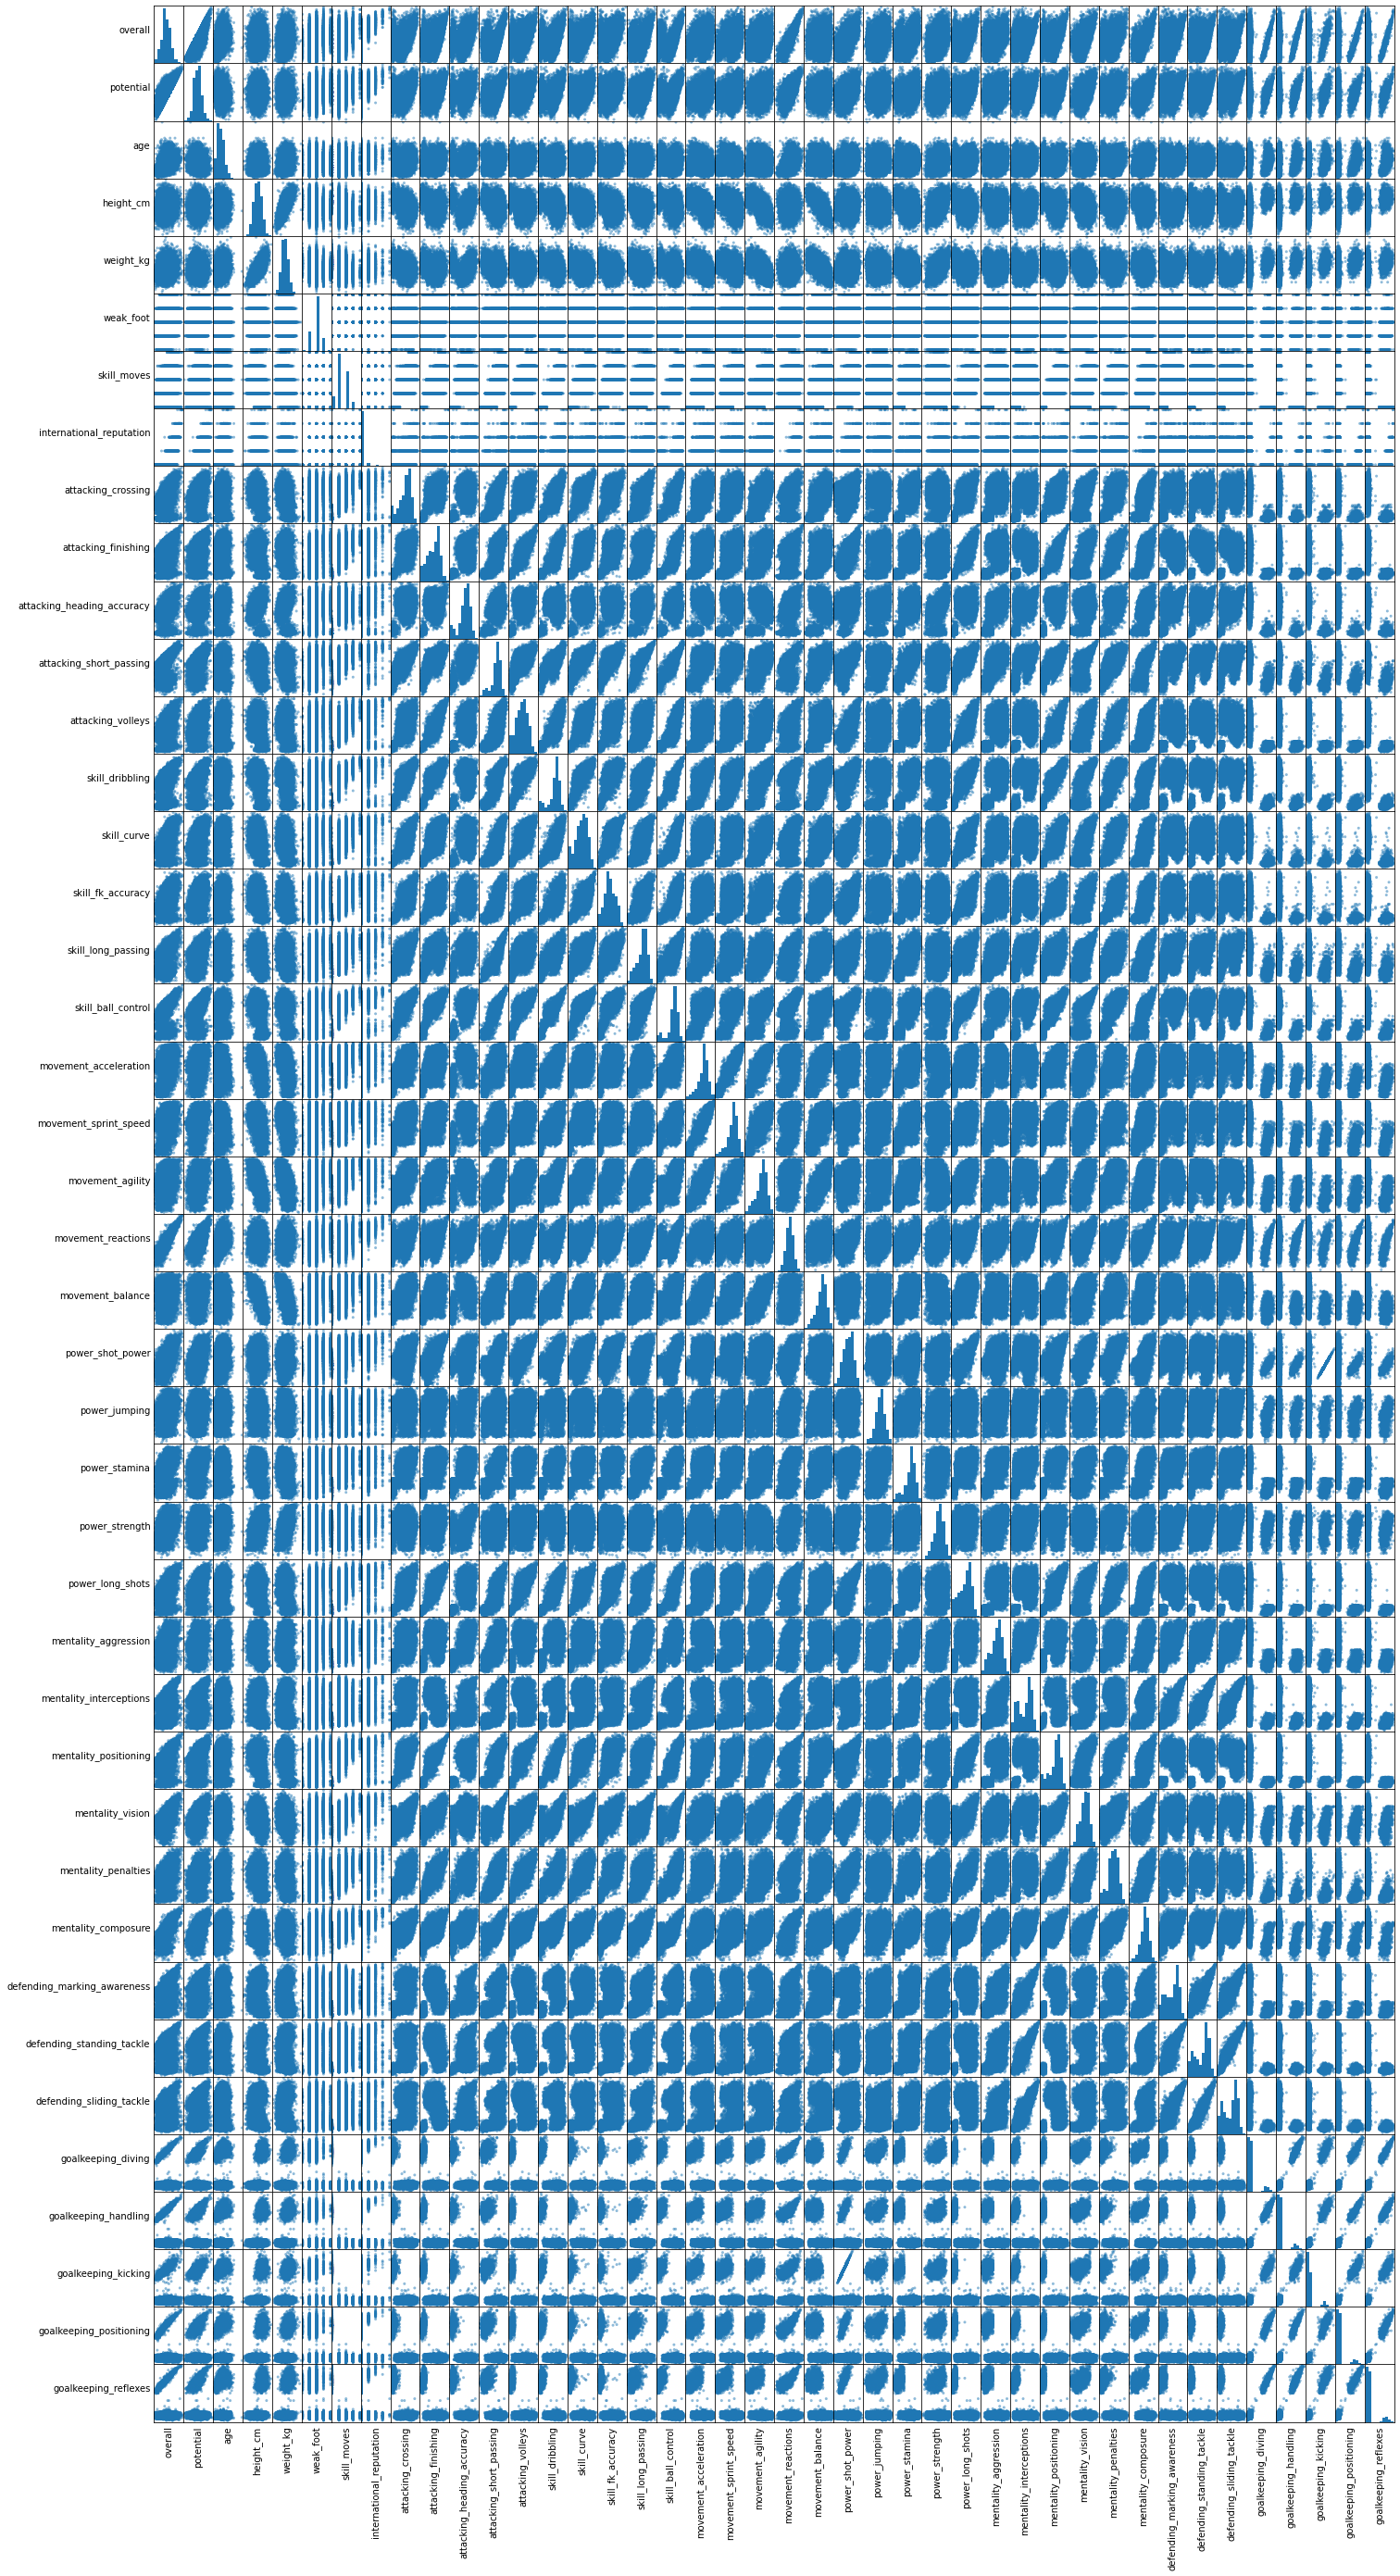

In [43]:
from pandas.plotting import scatter_matrix

numeric_features = [t[0] for t in overall_players.dtypes if t[1] == 'int' or t[1] == 'double']

sampled_data = overall_players.select(numeric_features).toPandas()

axs = scatter_matrix(sampled_data, figsize=(24, 48));

n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

# **Model Creation**

### **Using all columns**

Importing densevector from pyspark and using it along with map function to map overall column values to label and all other predictors under column name features which is basically a vector containing all the predictor column values.
Further on we create a dataframe containing those two columns as seen below.

In [45]:
# Import `DenseVector`
from pyspark.ml.linalg import DenseVector

# Define the `input_data` 
input_data = overall_players.rdd.map(lambda x: (x[0], DenseVector(x[1:])))

# Replace `df` with the new DataFrame
data = spark.createDataFrame(input_data, ["label", "features"])

Doing a random split of data and checking the percent of data in train category matches the specified percentage or not.

In [46]:
#splitting dataset into train & test group
train_data, test_data = data.randomSplit([0.75, 0.25])

# Check that training set has around 80% of records
training_ratio = train_data.count() / overall_players.count()
print(training_ratio)

0.7527938042517802


Checking the top 5 rows of train and test data.

In [47]:
print(train_data.show(5))

print(test_data.show(5))

+-----+--------------------+
|label|            features|
+-----+--------------------+
|   63|[63.0,21.0,182.0,...|
|   63|[63.0,27.0,173.0,...|
|   63|[63.0,27.0,175.0,...|
|   63|[63.0,27.0,176.0,...|
|   63|[63.0,27.0,178.0,...|
+-----+--------------------+
only showing top 5 rows

None
+-----+--------------------+
|label|            features|
+-----+--------------------+
|   63|[63.0,27.0,170.0,...|
|   63|[63.0,28.0,176.0,...|
|   63|[63.0,28.0,180.0,...|
|   63|[63.0,28.0,180.0,...|
|   63|[63.0,28.0,181.0,...|
+-----+--------------------+
only showing top 5 rows

None


Importing linear regression model from pyspark and initiating the model by setting the required parameters like maxIter (setting the maximum number of iterations to be done), regParam and elasticNetParam. Also we have set the output or target column as "label".

In [50]:
# Import `LinearRegression`
from pyspark.ml.regression import LinearRegression

# Initialize `lr`
lr = LinearRegression(labelCol="label", maxIter=10, regParam=0.3, elasticNetParam=0.8)
#lr = LinearRegression(labelCol="label", featuresCol="features", maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the data to the model
linearModel = lr.fit(train_data)

Applying the model on test data and checking the predictions for first 20 rows of test dataset.

In [51]:
# Generate predictions
predicted = linearModel.transform(test_data)
predicted.show()

+-----+--------------------+------------------+
|label|            features|        prediction|
+-----+--------------------+------------------+
|   63|[63.0,27.0,170.0,...|   64.184275047888|
|   63|[63.0,28.0,176.0,...|62.440725137155624|
|   63|[63.0,28.0,180.0,...|62.319088642101605|
|   63|[63.0,28.0,180.0,...| 62.22306414260453|
|   63|[63.0,28.0,181.0,...|63.474710583590166|
|   63|[63.0,28.0,184.0,...|62.525078599436796|
|   63|[63.0,28.0,186.0,...| 64.07935123276175|
|   63|[63.0,28.0,188.0,...| 61.51905153444819|
|   63|[63.0,29.0,173.0,...| 64.63293518278925|
|   63|[63.0,29.0,177.0,...| 60.99879602471571|
|   63|[63.0,29.0,180.0,...| 63.62676161960377|
|   63|[63.0,29.0,180.0,...|62.361225398894334|
|   63|[63.0,29.0,180.0,...|62.461350203131374|
|   63|[63.0,29.0,182.0,...| 64.14649257879961|
|   63|[63.0,29.0,183.0,...| 62.11264393286841|
|   63|[63.0,29.0,188.0,...| 62.78602561684623|
|   63|[63.0,29.0,190.0,...| 61.12265602118269|
|   63|[63.0,29.0,191.0,...| 62.53061345

Printing the adjusted R-squared value & RMSE value of the model when applied on training dataset.

In [58]:
#R-square value & RMSE of the model
print(linearModel.summary.r2adj)
print(linearModel.summary.rootMeanSquaredError)

0.9044588965055013
2.120576744906865


Applying the modelled linear regression on three sets of data - train, test and initial complete dataset (data).

In [59]:
result_train = linearModel.evaluate(train_data)

result_test = linearModel.evaluate(test_data)

result_data = linearModel.evaluate(data)

Getting the adjusted R-squared and RMSE values for the trained model on training and testing dataset.

In [57]:
print("The adjusted R-squared value for train data is", result_train.r2adj, "and for test data is", result_test.r2adj)

print("The RMSE value for train data is", result_train.rootMeanSquaredError, "and for test data is", result_test.rootMeanSquaredError)

The adjusted R-squared value for train data is 0.9044588965055013 and for test data is 0.9071592268820885
The RMSE value for train data is 2.120576744906865 and for test data is 2.0962695510004403


Getting the adjusted R-squared and RMSE value for the model when applied on the whole dataset.

In [60]:
print("The adjused R-squared value for whole data is", result_data.r2adj, "and RMSE for whole data is", result_data.rootMeanSquaredError)

The adjused R-squared value for whole data is 0.9053333611157569 and RMSE for whole data is 2.1145938546189105


### **Using Columns not having high correlation**

Now, we will be using the dataframe we created earlier by removing all the highly correlated columns. Checking the first two rows of the dataframe.

In [80]:
corr_reduced_data.show(2)

+-------+---------+---+---------+---------+---------+-----------+------------------------+--------------------------+------------------+----------------+----------------+-------------+-------------+--------------+--------------------+----------------+-------------------+
|overall|potential|age|height_cm|weight_kg|weak_foot|skill_moves|international_reputation|attacking_heading_accuracy|movement_reactions|movement_balance|power_shot_power|power_jumping|power_stamina|power_strength|mentality_aggression|mentality_vision|mentality_composure|
+-------+---------+---+---------+---------+---------+-----------+------------------------+--------------------------+------------------+----------------+----------------+-------------+-------------+--------------+--------------------+----------------+-------------------+
|     93|       93| 34|      170|       72|        4|          4|                       5|                        70|                94|              95|              86|           68|

Initiating linear regression model based on above dataset.

In [81]:
# Import `DenseVector`
from pyspark.ml.linalg import DenseVector

# Define the `input_data` 
corr_input_data = corr_reduced_data.rdd.map(lambda x: (x[0], DenseVector(x[1:])))

# Replace `df` with the new DataFrame
corr_data = spark.createDataFrame(corr_input_data, ["label", "features"])

Splitting the dataset and checking the ratio of training dataset.

In [82]:
#splitting dataset into train & test group
corr_train_data, corr_test_data = corr_data.randomSplit([0.75, 0.25])

# Check that training set has around 80% of records
training_ratio = corr_train_data.count() / corr_data.count()
print(training_ratio)

0.7458807630334217


Applying the train model on test dataset and comparing predicted value with actual value, side by side, for first 20 rows of data.

In [83]:
# Import `LinearRegression`
from pyspark.ml.regression import LinearRegression

# Initialize `lr`
lr = LinearRegression(labelCol="label", maxIter=10, regParam=0.3, elasticNetParam=0.8)
#lr = LinearRegression(labelCol="label", featuresCol="features", maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the data to the model
corr_linearModel = lr.fit(corr_train_data)

# Generate predictions
predicted = corr_linearModel.transform(corr_test_data)
predicted.show()

+-----+--------------------+------------------+
|label|            features|        prediction|
+-----+--------------------+------------------+
|   63|[63.0,27.0,173.0,...| 61.73137050120442|
|   63|[63.0,27.0,178.0,...|60.699933435333904|
|   63|[63.0,27.0,180.0,...| 62.79179720394833|
|   63|[63.0,27.0,180.0,...|63.079994160726905|
|   63|[63.0,27.0,182.0,...| 64.07587579715069|
|   63|[63.0,28.0,173.0,...|  62.4986921529734|
|   63|[63.0,28.0,183.0,...|60.973857800960744|
|   63|[63.0,28.0,186.0,...|61.807142923644086|
|   63|[63.0,28.0,190.0,...| 62.37912789054108|
|   63|[63.0,29.0,180.0,...|60.819014753072636|
|   63|[63.0,29.0,185.0,...|63.138309134465125|
|   63|[63.0,29.0,185.0,...| 62.47447577373894|
|   63|[63.0,29.0,186.0,...| 65.36306422154168|
|   63|[63.0,29.0,189.0,...| 63.48880760742602|
|   63|[63.0,29.0,190.0,...| 61.30766076295797|
|   63|[63.0,30.0,177.0,...| 65.34070588676522|
|   63|[63.0,30.0,178.0,...| 63.62804080849403|
|   63|[63.0,30.0,178.0,...| 62.62075094

Applying the modelled linear regression on three sets of data - train, test and initial complete dataset (data).

In [84]:
corr_result_train = corr_linearModel.evaluate(corr_train_data)

corr_result_test = corr_linearModel.evaluate(corr_test_data)

corr_result_data = corr_linearModel.evaluate(corr_data)

Checking the adjusted R-squared value and RMSE for the model trained on un-correlated dataset when applied on train and testing dataset. 

In [85]:
print("The adjusted R-squared value for train data is", corr_result_train.r2adj, "and for test data is", corr_result_test.r2adj)

print("The RMSE value for train data is", corr_result_train.rootMeanSquaredError, "and for test data is", corr_result_test.rootMeanSquaredError)

The adjusted R-squared value for train data is 0.893939311323701 and for test data is 0.8906159600412686
The RMSE value for train data is 2.2412896307933132 and for test data is 2.2655435428725514


The above result seems maginificent, given, the adjusted R2 value didn't take a hit at all and we managed to reduce the number of features by a tremendous amount.

Printing the adjusted R-squared value and RMSE for the uncorrelated train dataset trained model when applied on entire uncorrelated dataset.

In [86]:
print("The adjused R-squared value for whole data is", corr_result_data.r2adj, "and RMSE for whole data is", corr_result_data.rootMeanSquaredError)

The adjused R-squared value for whole data is 0.8931950841461798 and RMSE for whole data is 2.2474778218985088


# **Conclusions**

Above we modelled the linear regression on all numeric columns and on dataset which are not highly correlated at all.

After checking the results, we saw that the adjusted R2 value and RMSE didn't take any considerable hit at all given we reduced the predictor variables by a great number. The adjusted R2 value only dropped from 0.90 to 0.89 which is merely 1% and RMSE value changed from 2.11 to 2.24 which is again a very marginal increase given the amount of features we reduced.